### Question 1:
We run a two-sample t-test for equal means, with α = 0.05, and obtain a p-value of 0.04.
What are the odds that the two samples are drawn from distributions with the same mean?
(a) 19/1 (b) 1/19 (c) 1/20 (d) 1/24 (e) unknown

(d) $\frac{1}{24}$

### Question 2:
When running a series of trials we need a rule on when to stop. Two common rules are:

1. Run exactly n trials and stop.
2. Run trials until you see a certain result and then stop.

In this example we’ll consider two coin tossing experiments.

Experiment 1: Toss the coin exactly 6 times and report the number of heads.

Experiment 2: Toss the coin until the first tails and report the number of heads.

Jon is worried that his coin is biased towards heads, so before using it in class he tests it for fairness. He runs an experiment and reports to Jerry that his sequence of tosses was HHHHHT. But Jerry is only half-listening, and he forgets which experiment Jon ran to produce the data.


* What is the Frequentist approach?

* What is the Bayesian approach?

#### Frequentist approach:

Frequentists think _deductively_, so at a high level, the reasoning is: "If the true probability of flipping heads is $p$, then my samples will probably look like this."  In other words, to a frequentist the underlying parameters are fixed and the observed data are random.

If Jon is worried that his coin is biased toward heads, the frequentist approach to making a conclusion is as follows:

Null hypothesis: The coin is not biased toward heads $(p \leq 0.5)$.

Alternative hypothesis: The coin is biased toward heads $(p > 0.5)$.

We assume the null hypothesis to be true, and we test at the edge case $(p = 0.5)$.  Since we are dealing with two very well known distributions (Experiment 1 yields a Binomial distribution and Experiment 2 yields a Geometric distribution).  We know both the mean $(\mu)$ and standard deviation $(\sigma)$ of the underlying distribution under the null hypothesis.  This means we can execute a Z-test.  The Z-test invokes the Central Limit Theorem, which tells us that if we were to perform either experiment a large number of times, and record the sample mean each time, the sample means will take on the following distribution:

$${\overline X} \sim \mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{n}}\right) $$

Normalizing this distribution by applying the following transformation

$$Z = \frac{{\overline X} - \mu_{{\overline X}}}{\sigma_{{\overline X}}}$$

gives us the Z distribution.  We can now perform our Z-test (by looking up the Z value of our observed data) to determine the probability of observing the observed sample mean under the null hypothesis.  If the probability is below some pre-determined threshold ($\alpha < 0.05$ in many cases, but this varies wildly by field), then we have met the criteria to reject our null hypothesis in favor of our alternative hypothesis.  If the probability of observing our sample mean is not within the pre-determined range, then we fail to reject our null hypothesis.

In the event that we reject our null hypothesis, we may repeatedly sample from our sample to bootstrap a Confidence Interval for the true probability value of getting heads, but we can't make any exact conclusions as to the true value.

The inherent flaws with the frequentist approach are:

1. $p$-values measured against some sample statistic change with the sample size.  This means two different teams working with the same data may get different $p$-values, which is not desirable.
2. The Confidence Interval for the true parameter value also depends heavily on sample size.
3. Confidence Intervals are not probability distributions, therefore they do not provide the most probable value for the true parameter in question.


#### Bayesian approach:

Bayesian statisticians think _inductively_, so at a high level, the reasoning is: "My sample came out like this, so the true parameter is probably $\theta$."  In other words, to a Bayesian statistician the data are fixed and the underlying parameters are random with associated distribution functions.

Let the underlying parameter be $\theta$, and let the observed event be $E$.  What we are trying to determine is the probability of a given parameter value, given our observed data $\left(P\left(\theta\thinspace|\thinspace E\right)\right)$.  In the context of Jon's concern, we are asking "Given the outcome $(E)$, what is the probability that the coin is biased toward heads $(\theta > 0.5)$?  To answer this, we need to invoke Bayes Theorem:

$$P\left(\theta\thinspace|\thinspace E\right) = \frac{P\left(E\thinspace|\thinspace\theta\right)P(\theta)}{P(E)}$$

Here, $P(\theta)$ is the prior (i.e. the strength of our belief in the coin's fairness before the experiment).  It is perfectly fine to believe the coin has any degree of fairness going into the experiment $\left(0 \leq \theta \leq 1 \right)$.

$P(E\thinspace|\thinspace\theta)$ is the probability of observing the data we observed, given our prior belief for $\theta$.

$P(E)$ is the evidence.  This is the probability of the data as determined by summing (for discrete variables) or integrating (for continuous variables) across all possible values of $\theta$ weighted by how strongly we believe in those particular values.

To define everything correctly, we need two mathematical models before hand, one that defines our prior beliefs and one that defines the likelihood of our data, given our beliefs.

If we don't really have any prior beliefs, then we can choose an "uninformative prior."  In this case, we can choose the $B$-distribution.

For the model that defines the likelihood of our data, we simply use the Bernoulli Likelihood Function, which has the general definition:

$$P\left(x_1, x_2, ..., x_n \thinspace|\thinspace\theta\right) = \prod_{i=1}^{n} P(x_i\thinspace|\thinspace\theta)$$

Again, we are very lucky to be dealing with such well understood distributions in Experiments 1 and 2, because the likelihood functions are readily available.

Once our posterior distribution $P(\theta\thinspace|\thinspace E)$ is calculated, we need to determine how we test for the significance of our result.  For this, we calculate a Bayes Factor by comparing the Null and Alternative hypotheses from our prior and posterior beliefs.  A common rejection criterion is BF < 1/10, but like the $p$-value this can also vary from field to field.  The BF is calculated thusly:

$$BF = \frac{P(\theta \in null \thinspace|\thinspace E)}{P(\theta \in alt\thinspace|\thinspace E)} / \frac{P(\theta \in null)}{P(\theta \in alt)}$$

### Question 3:
Jerry steals a JP Licks token and asks Jon to perform a test at signiﬁcance level α = 0.05 to investigate whether the coin is fair or biased toward tails (the side that says ‘Token’). Jon records the following data ->

THTTHTTTTTTH

a. Ericka believes that Jon's intention was to count the number of heads in twelve flips. Let's call this experiment 1. Compute the rejection region and p-value. Show the distribution and rejection region. What does Erika conclude?

b. Jerry actually told Jon to count the number of heads in 100 ﬂips, so Jerry ﬁgures that Jon must have gotten bored and quit right after the 12th ﬂip. Strictly speaking, can Jerry compute a p-value from Jon’s partial data? Why or why not?

c. Let’s reexamine the same data from the Bayesian perspective. What is the likelihood function for in Experiment 1? Given the prior Beta(n,m), ﬁnd the posterior.

#### a.

Text(0.5,1,u'Z distribution and Rejection region (shaded)')

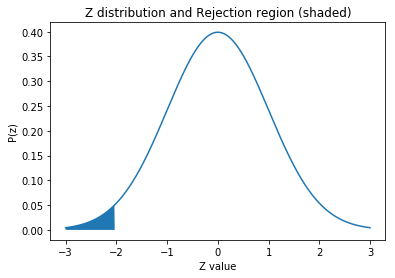

In [37]:
%matplotlib inline
from scipy.stats import binom, norm
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

p = 0.5 # null hypothesis
n = 12

mu_0 = n * p
sigma_0 = sqrt(n * p * (1 - p))
sigma_X = sigma_0 / sqrt(n)

alpha = norm.ppf(0.05)

# Central Limit Theorem

x = np.linspace(-3, 3, 1000)
Z = norm.pdf(x)

alpha_plot = norm.pdf(x)

alpha_plot[alpha_plot > norm.cdf(alpha)] = 0
alpha_plot[len(alpha_plot)/2:] = 0

z_value = (3 - mu_0)/sigma_X
p_value = norm.cdf(z_value)

plt.figure()
plt.plot(x, Z)
plt.fill_between(x, alpha_plot)
plt.xlabel("Z value")
plt.ylabel("P(z)")
plt.title("Z distribution and Rejection region (shaded)")

In [38]:
p_value

9.8658764503769458e-10

Ericka should conclude that the coin is biased toward tails.

#### b.

Strictly speaking, Jon _can_ still compute a $p$-value.  Some might argue that the result will only be significant if the bias is strong.  There are a lot of things that can throw off the result with a small $n$.

#### c.

I ran out of time (sorry).  I've got to get this downloaded and pushed, before the midnight deadline.